# 분류성능 평가지표

* 정확도(Accuracy)
* 오차행렬(Confusion Matrix)
* 정밀도(Precision)
* 재현율(Recall)
* F1 스코어

## Accuracy(정확도)

* 전체 데이터 중에서 제대로 분류된 데이터의 비율을 나타냅니다. 
* 즉, **```모델이 얼마나 정확하게 분류하는지```** 를 의미합니다. 
* 일반적으로 분류 모델의 주요 평가 방법으로 사용됩니다. 
* 그러나
* 클래스 비율이 불균형(imbalanced) 하거나, 이진분류의 경우 평가 지표의 신뢰성을 잃을 수 있습니다. 
* 예)신용카드사기검출(분류)의 경우 10만건은 정상거래이고, 1건이 사기일 때 사기 검출이 정상거래로 잘못 분류되었어도 대다수의 분류가 잘 분류되었기 때문에 99.9%의 정확도 결과가 나옵니다. 


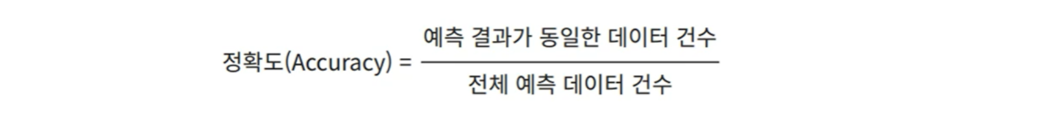

In [2]:
import numpy as np

y_test = np.append(np.zeros(99),1)
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [3]:
import numpy as np
from sklearn.metrics import accuracy_score


y_test = np.append(np.zeros(99),1) # 99개 0, 마지막 한개는 1, 완전 불균형 데이터 -> 실제 데이터
y_predict = np.zeros(100)         # 모두 0으로 예측한 예측 결과

accuracy_score(y_test,y_predict) # 와우 정확도가 99% 완벽하군~~

0.99

```
[기억하세요]

정확도는 양날의 칼이다.
정확도는 직관적이어서 해석이 편합니다. 
하지만 불균형 데이터로 이진분류를 하려고 할때 정확도의 값은 엉터리 결과가 나올 수 있다는 것을 명심합시다.
```

## Confusion Matrix(혼돈 행렬)

* 오차 행렬은 이진 뷴류의 예측 오류가 얼마인지 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표입니다. 

* **TN**: Negative라고 예측했는데 실제도 Negative  -- 정답
* **TP**: Positive라고 예측했는데 실제도 Positive -- 정답
* **FP**: Positive라고 예측했는데 실제는 Negative -- 오답
* **FN**: Negative라고 예측했는데 실제는 Positive -- 오답


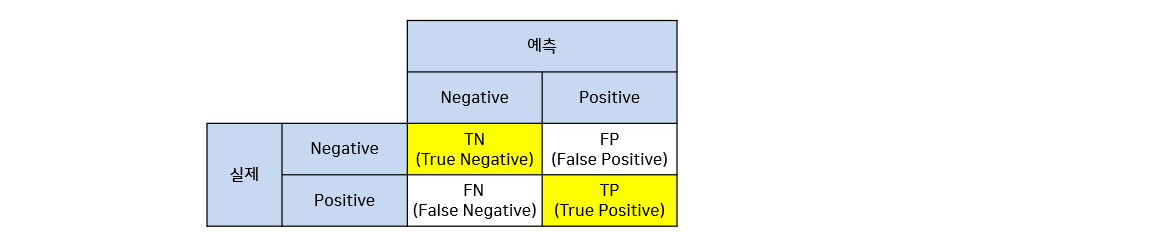

In [4]:
import pandas as pd
# y_test = np.append(np.zeros(45),np.ones(55)) 
# y_predict = np.append(np.zeros(50),np.ones(50)) 

y_test =    [1,1,1, 0,0,0,0, 1,1, 0]
y_predict = [1,1,1, 0,0,0,0, 0,0, 1]


pd.crosstab(y_test,y_predict,
            rownames=['실제'],# 행 이름
            colnames=['예측'], # 열 이름
            margins=True # 행 열의 합 보여주기
            )  

예측,0,1,All
실제,,,
0,4,1,5
1,2,3,5
All,6,4,10


In [6]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict) # 별로 도움이 안 됨. 귀찮음

array([[4, 1],
       [2, 3]])

## Precision(정밀도)

* 예측을 Positive라고 분류한 데이터 중에서
* 실제로 Positive인 데이터 비율

**```Negative가 중요한 경우```**

즉, 실제로 Negative인 데이터를 Positive라고 판단하면 안되는 경우 사용되는 지표

* 스팸 메일 판결을 위한 분류 문제 
* 해당 메일이 스팸일 경우 Positive,
* 스팸이 아닐 경우 즉, 일반 메일일 경우 Negative
* 일반 메일을 스팸 메일(Positive)로 잘못 예측했을 경우, 중요한 메일을 전달받지 못하는 상황이 발생할 수 있음

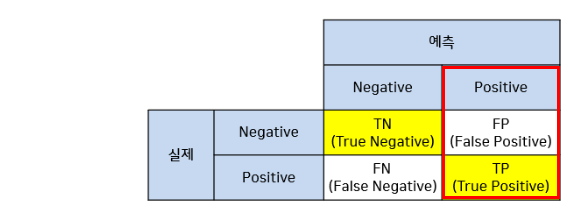

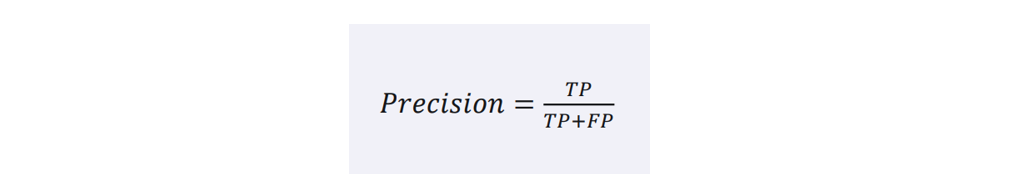

In [7]:
import pandas as pd
from sklearn.metrics import precision_score


y_test =    [1,1,1, 0,0,0,0, 0,0, 0] # 실제 정상 메일
y_predict = [1,1,1, 0,0,0,0, 0,0, 1] # 스팸으로 예측

print(f'정확도:{accuracy_score(y_test,y_predict)}')
print(f'정밀도:{precision_score(y_test,y_predict)}')
pd.crosstab(y_test,y_predict,
            rownames=['실제'],# 행 이름
            colnames=['예측'], # 열 이름
            margins=True # 행 열의 합 보여주기
            )  

정확도:0.9
정밀도:0.75


예측,0,1,All
실제,,,
0,6,1,7
1,0,3,3
All,6,4,10


## Recall(재현율)

* 실제로 Positive인 데이터 중에서
* 예측이 Positive로 분류한 데이터의 비율
* 민감도(Sensitivity), 참긍정률(TP Rate)과 같은 말

**```Positive가 중요한 경우```**

즉,실제로 Positive인 데이터를 Negative라고 판단하면 안되는 경우 사용하는 지표

* 악성 종양 여부 판결을 위한 검사
* 악성 종양일 경우 Positive
* 악성 종양이 아닐 경우 즉, 양성 종양일 경우 Negative
* 악성 종양(Positive)을 양성 종양(Negative)으로 잘못 예측했을 경우 제 때 치료를 받지 못하게 되어 생명이 위험해질 수 있음


* 금융사기
    


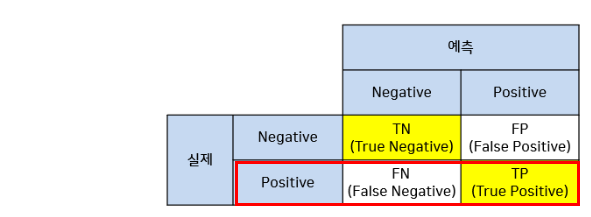

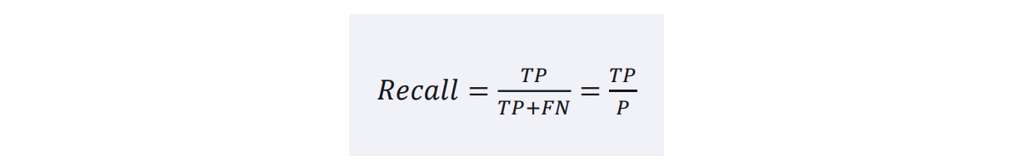

In [8]:
import pandas as pd
from sklearn.metrics import precision_score,recall_score

y_test =    [1,1,1, 0,0,0,0, 0,0, 1] #실제 암
y_predict = [1,1,1, 0,0,0,0, 0,0, 0] #암이 아니라고 예측

print(f'정확도:{accuracy_score(y_test,y_predict)}')
print(f'정밀도:{precision_score(y_test,y_predict)}')
print(f'재현율:{recall_score(y_test,y_predict)}')

pd.crosstab(y_test,y_predict,
            rownames=['실제'],# 행 이름
            colnames=['예측'], # 열 이름
            margins=True # 행 열의 합 보여주기
            )  

######################################################################
#정확도,정밀도에서 점수가 잘 나왔지만, 재현율을 통해 몹쓸 분류라는 것이 밝혀졌다.  

정확도:0.9
정밀도:1.0
재현율:0.75


예측,0,1,All
실제,,,
0,6,0,6
1,1,3,4
All,7,3,10


## F1 Score

* F1 스코어는 정밀도와 재현율을 결합한 지표입니다. 
* F1 스코어는 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가집니다. 
* 0 ~ 1 사이의 값 가집니다. 

예를 들어
* A 예측 모델의 경우 정밀도가 0.9, 재현율이 0.1 
* B 예측 모델의 경우 정밀도가 0.5, 재현율이 0.5
* F1 스코어는 A 예측 모델의 경우 0.18, B 예측 모델의 경우 0.5로
* 모델 B가 A에 비해 우수한 F1 스코어를 가집니다. 

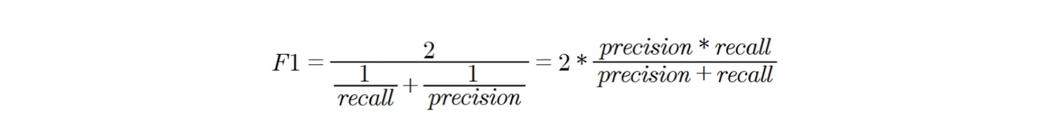

In [9]:
from sklearn.metrics import precision_score,recall_score,f1_score

y_test =    [1,1,1, 0,0,0,0, 0,0, 1] #실제 암
y_predict = [1,1,1, 0,0,0,0, 0,0, 0] #암이 아니라고 예측

print(f'정확도:{accuracy_score(y_test,y_predict)}')
print(f'정밀도:{precision_score(y_test,y_predict)}')
print(f'재현율:{recall_score(y_test,y_predict)}')
print(f'f1:{f1_score(y_test,y_predict)}')


정확도:0.9
정밀도:1.0
재현율:0.75
f1:0.8571428571428571


## 분류 보고서

In [10]:
from sklearn.metrics import classification_report
y_test =    [1,1,1, 0,0,0,0, 0,0, 1] #실제 암
y_predict = [1,1,1, 0,0,0,0, 0,0, 0] #암이 아니라고 예측
target_names=['암아님','암']

print(classification_report(y_test,y_predict,target_names=target_names))

              precision    recall  f1-score   support

         암아님       0.86      1.00      0.92         6
           암       1.00      0.75      0.86         4

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



```
* support: 각 클래스에 있는 관측치 개수
* macro avg: 각 클래스에 대한 지표: support를 고려하지 않음.
* weighted avg: 각 클래스의 샘플 수로 가중치를 적용하여 계산. 불균형 데이터일 경우 유용
```

In [11]:

y_test =    [1,1,1, 0,0,0,0, 0,0, 0] # 실제 정상 메일
y_predict = [1,1,1, 0,0,0,0, 0,0, 1] # 스팸으로 예측
target_names=['일반','스팸']

print(classification_report(y_test,y_predict,target_names=target_names))

              precision    recall  f1-score   support

          일반       1.00      0.86      0.92         7
          스팸       0.75      1.00      0.86         3

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



## 다중분류

In [12]:
y_test =    [0,0,0,0, 1,1,1,1, 2,2,2,2] # 사과,포도,딸기
y_predict = [0,0,0,0, 1,1,1,0, 2,2,0,1] 
target_names=['사과','포도','딸기']

accuracy = accuracy_score(y_test,y_predict)
precision = precision_score(y_test,y_predict, average='micro' )
recall = recall_score(y_test,y_predict, average='micro' )
f1 = f1_score(y_test,y_predict, average='micro' )

print(f'정확도:{accuracy}')
print(f'정밀도:{precision}')
print(f'재현율:{recall}')
print(f'f1:{f1}')



print(classification_report(y_test,y_predict,target_names=target_names))

정확도:0.75
정밀도:0.75
재현율:0.75
f1:0.75
              precision    recall  f1-score   support

          사과       0.67      1.00      0.80         4
          포도       0.75      0.75      0.75         4
          딸기       1.00      0.50      0.67         4

    accuracy                           0.75        12
   macro avg       0.81      0.75      0.74        12
weighted avg       0.81      0.75      0.74        12



In [13]:
y_test =    [0,0,0,0, 1,1,1,1, 2,2,2,2] # 사과,포도,딸기
y_predict = [0,0,0,0, 1,1,1,0, 2,2,0,1] 
target_names=['사과','포도','딸기']

pd.crosstab(y_test,y_predict,
            rownames=['실제'],# 행 이름
            colnames=['예측'], # 열 이름
            margins=True # 행 열의 합 보여주기
            )  

예측,0,1,2,All
실제,,,,
0,4,0,0,4
1,1,3,0,4
2,1,1,2,4
All,6,4,2,12


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[4, 0, 0],
       [1, 3, 0],
       [1, 1, 2]])